In [1]:
import sys
sys.path = ["/Users/hideto/dropbox/HIDETO_MORI.LAB/Experiments/Project/Patchplot/patchworklib"] + sys.path
import patchworklib as pw 
import time
t0 = time.time() 
quick=True

<Figure size 72x72 with 0 Axes>

## Patchworklib: patchwork for matplotlib
The patchworklib module provides the Brick class that is the subclass of matplotlib.axes.Axes.  
Each subclass object can be joined with other Brick class objects by using "|" or "/" operands.  
When creating a Brick class object, 'figsize' and 'label' property should be specified, and the 'label' value should be unique among the Brick class objects generated in a script.  
The 'figsize' of an object of the Brick class is not a fixed value. It may be changed in the process of aligning multiple graphs on a tidy layout.   
However, the aspect ratio of each Brick is basically preserved in the process.

For details, see the following example.

### 1. Arranging and stacking multiple axes objects with different aspect ratios

In [2]:
ax1 = pw.Brick("ax1",(1,1))
ax2 = pw.Brick("ax2",(1,3)) 
ax1.set_title("ax1")
ax2.set_title("ax2") 

Text(0.5, 1.0, 'ax2')

CPU times: user 134 ms, sys: 69 ms, total: 203 ms
Wall time: 87.7 ms


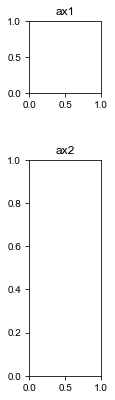

In [3]:
%%time
#arrange two Brick class objects with the vertical direction.
ax12 = ax1 / ax2
ax12.savefig(fname=None, bbox_inches="tight", quick=quick)

In the above case, the widths of 'ax1' and ax2' are same. Therefore, their figure size has not been changed.

CPU times: user 178 ms, sys: 120 ms, total: 298 ms
Wall time: 114 ms


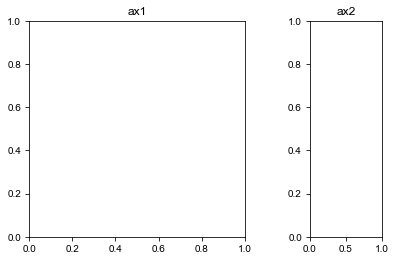

In [4]:
%%time
#arrange two Brick class objects with the vertical direction.
ax12 = ax1 | ax2
ax12.savefig(fname=None, quick=quick) #If 'fname' is Noen, it just return a figure object.  

In this case, the original height of 'ax2' is larger than ax1. Therefore, the size of 'ax1' has been automatically expanded to match ax2. 

The joined 'ax1' and 'ax2' is returned as Bricks class objects that holds multiple Brick class objects.  
Bricks class objects can also be joined with other Brick and Bricks class objects as follows.

CPU times: user 123 ms, sys: 3.45 ms, total: 126 ms
Wall time: 124 ms


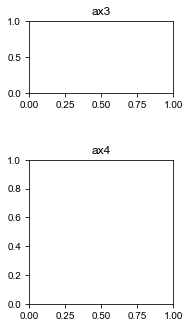

In [5]:
%%time
ax3 = pw.Brick("ax3",(2,1))
ax4 = pw.Brick("ax4",(2,2))
ax3.set_title("ax3")
ax4.set_title("ax4") 
ax34 = ax3/ax4
ax34.savefig(fname=None, quick=quick)

CPU times: user 306 ms, sys: 2.9 ms, total: 309 ms
Wall time: 308 ms


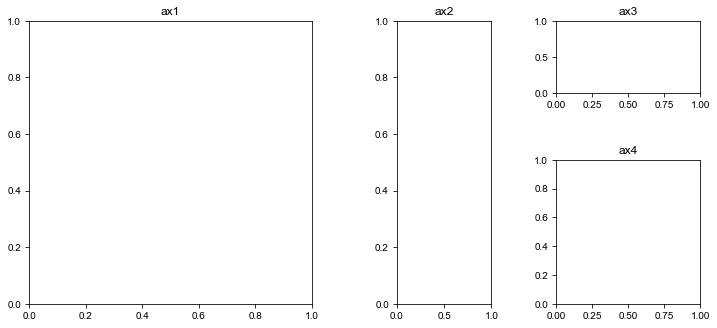

In [6]:
%%time
ax1234 = ax12 | ax34
ax1234.savefig(fname=None, quick=quick)

In [7]:
pw.clear()

### 2. Placing multiple seaborn plots with tidy layout
Seaborn provides functions for drawing attractive statistical graphics. However, they do not provide the function to arrange the multiple graphs generated using seaborn.
By using patchworklib, you can easily arrange seaborn plots the way you want.

In [8]:
import seaborn as sns
import numpy  as np
import pandas as pd

CPU times: user 1 s, sys: 4.4 ms, total: 1.01 s
Wall time: 1.01 s


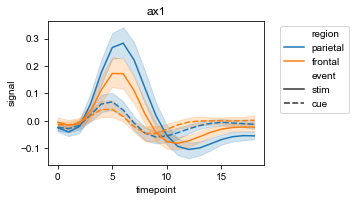

In [9]:
%%time
fmri = sns.load_dataset("fmri")
ax1 = pw.Brick("ax1", figsize=(3,2))
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri, ax=ax1)
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax1.set_title("ax1")
ax1.savefig(quick=quick) 

CPU times: user 124 ms, sys: 1.71 ms, total: 125 ms
Wall time: 125 ms


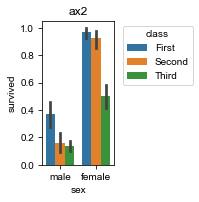

In [10]:
%%time
titanic = sns.load_dataset("titanic")
ax2 = pw.Brick("ax2", figsize=(1,2))
sns.barplot(x="sex", y="survived", hue="class", data=titanic, ax=ax2)
ax2.move_legend(new_loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax2.set_title("ax2")
ax2.savefig(quick=quick)

CPU times: user 134 ms, sys: 9.29 ms, total: 144 ms
Wall time: 143 ms


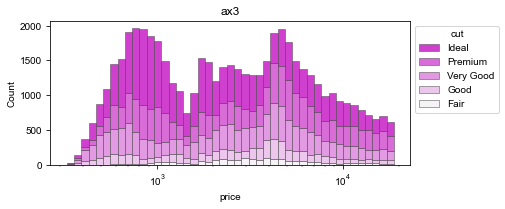

In [11]:
%%time
diamonds = sns.load_dataset("diamonds")
ax3 = pw.Brick("ax3", (5,2))
sns.histplot(diamonds, x="price", hue="cut", multiple="stack",
    palette="light:m_r", edgecolor=".3", linewidth=.5, log_scale=True,
    ax = ax3)
ax3.move_legend(new_loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax3.set_title("ax3")
ax3.savefig(quick=quick)

CPU times: user 48.8 ms, sys: 1.71 ms, total: 50.5 ms
Wall time: 49.8 ms


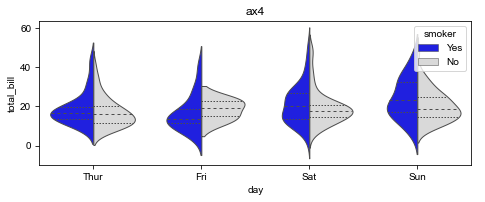

In [12]:
%%time
tips = sns.load_dataset("tips")
ax4 = pw.Brick("ax4", (6,2))
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
    split=True, inner="quart", linewidth=1,
    palette={"Yes": "b", "No": ".85"},
    ax=ax4)
ax4.set_title("ax4")
ax4.savefig(quick=quick)

CPU times: user 72.4 ms, sys: 3.04 ms, total: 75.4 ms
Wall time: 73.8 ms


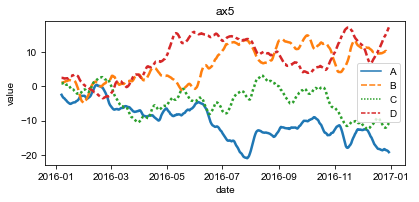

In [13]:
%%time
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()
ax5 = pw.Brick("ax5", (5,2))
sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax5)
ax5.set_xlabel("date")
ax5.set_ylabel("value")
ax5.set_title("ax5")
ax5.savefig(quick=quick)

**Let's align them**

CPU times: user 95 ms, sys: 2.41 ms, total: 97.4 ms
Wall time: 96.6 ms


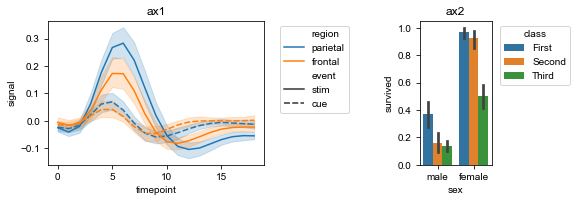

In [14]:
%%time
ax12 = ax1|ax2
ax12.savefig(quick=quick)

CPU times: user 268 ms, sys: 3.1 ms, total: 271 ms
Wall time: 270 ms


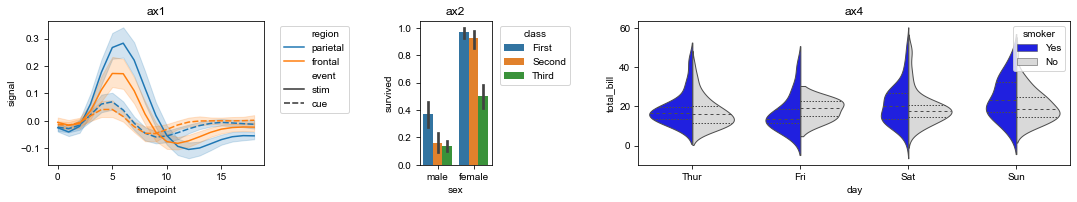

In [15]:
%%time
ax124 = (ax1|ax2)|ax4
ax124.savefig(quick=quick)

CPU times: user 1.11 s, sys: 11.3 ms, total: 1.12 s
Wall time: 1.11 s


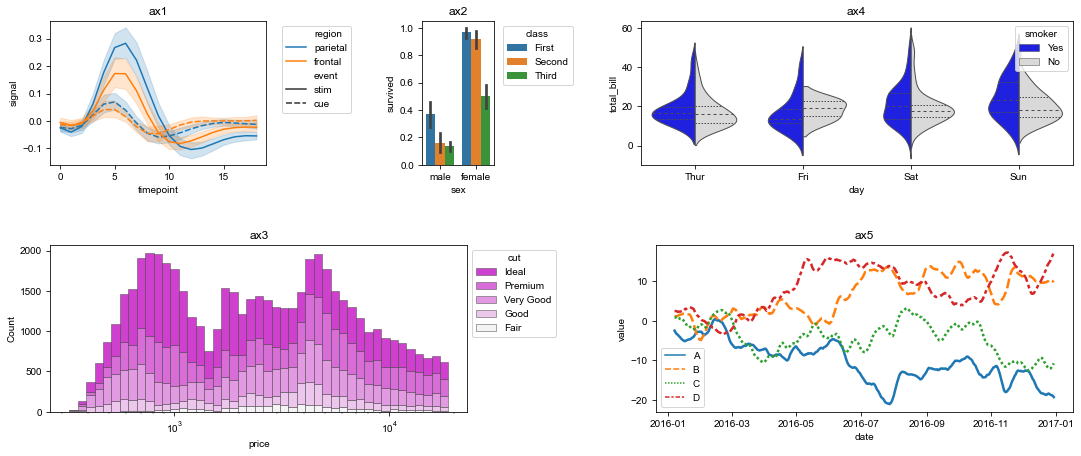

In [16]:
%%time
ax12435 = ax124/(ax3|ax5)
ax12435.savefig(quick=quick)

CPU times: user 1.19 s, sys: 12.3 ms, total: 1.2 s
Wall time: 1.2 s


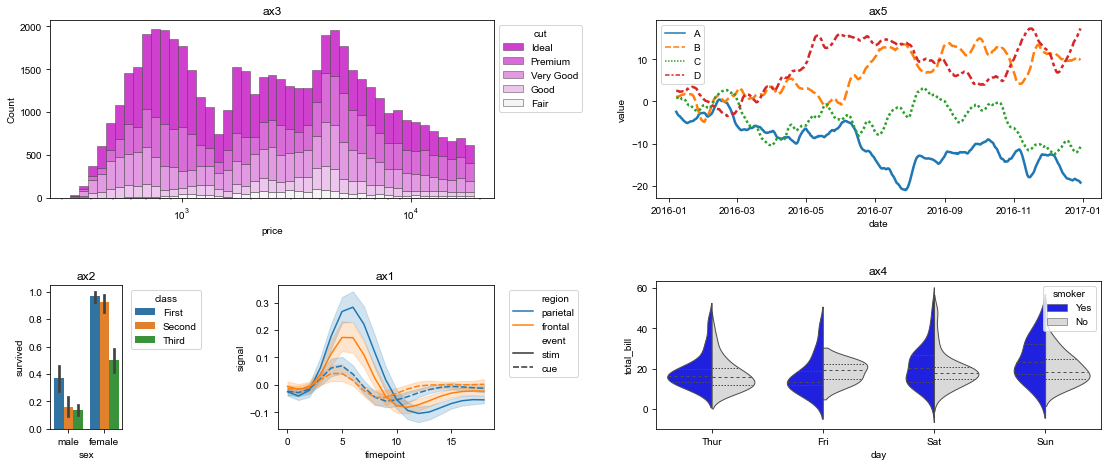

In [17]:
%%time
ax35214 = (ax3/(ax2|ax1))|(ax5/ax4)
ax35214.savefig(quick=quick)

CPU times: user 1.17 s, sys: 10.4 ms, total: 1.18 s
Wall time: 1.18 s


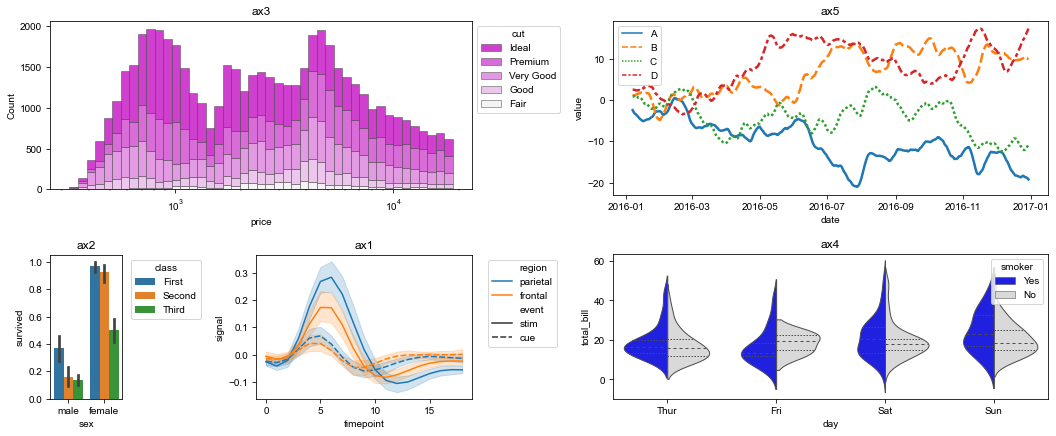

In [18]:
%%time
pw.param["margin"]=0.2 #Default value is 0.5.
ax35214 = (ax3/(ax2|ax1))|(ax5/ax4)
ax35214.savefig(quick=quick)

CPU times: user 1.27 s, sys: 15.3 ms, total: 1.29 s
Wall time: 1.29 s


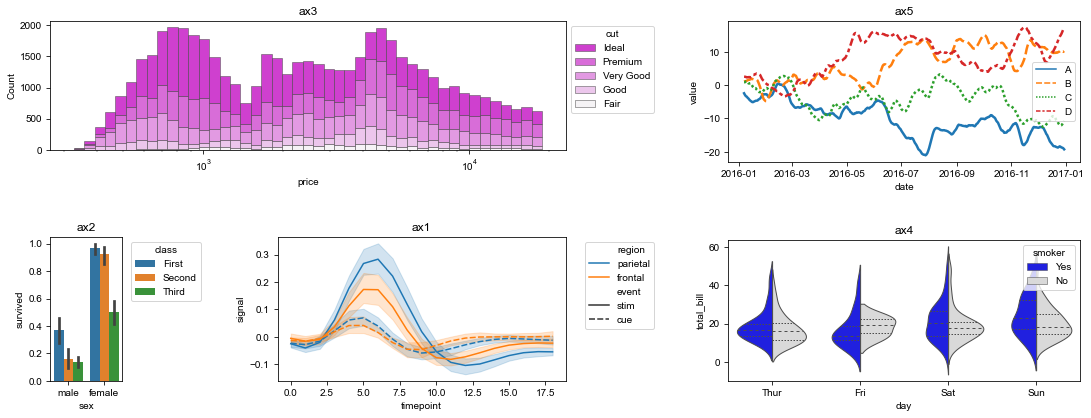

In [19]:
%%time
pw.param["margin"]=0.5
ax1.change_aspectratio((4,2))
ax3.change_aspectratio((4,1))
ax4.change_aspectratio((5,2))
ax35214_v2 = (ax3/(ax2|ax1))|(ax5/ax4)
ax35214_v2.savefig(quick=quick)

CPU times: user 495 ms, sys: 5.72 ms, total: 501 ms
Wall time: 500 ms


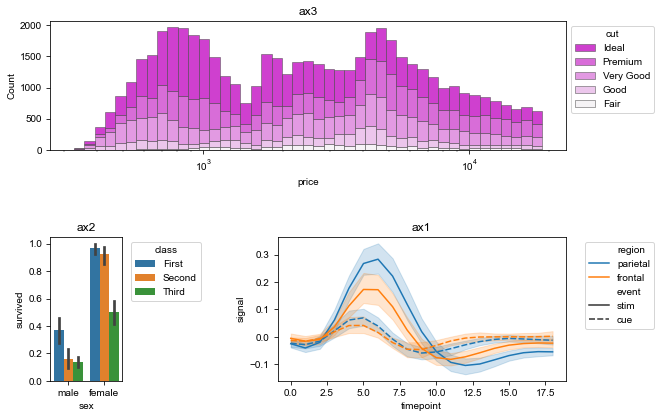

In [20]:
%%time
ax321 = ax3/(ax2|ax1)
ax321.savefig(quick=quick)

CPU times: user 323 ms, sys: 5.11 ms, total: 329 ms
Wall time: 328 ms


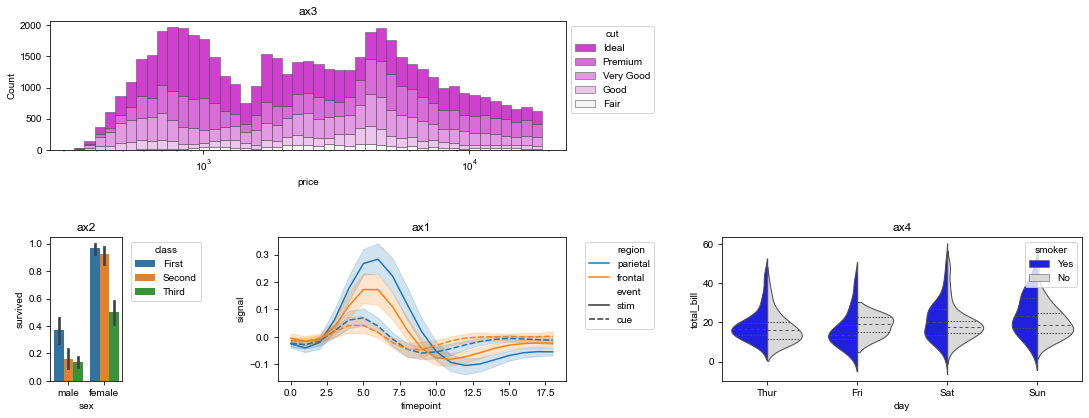

In [21]:
%%time
ax3214 = ax321["ax1"]|ax4
ax3214.savefig(quick=quick)

CPU times: user 531 ms, sys: 7.12 ms, total: 538 ms
Wall time: 537 ms


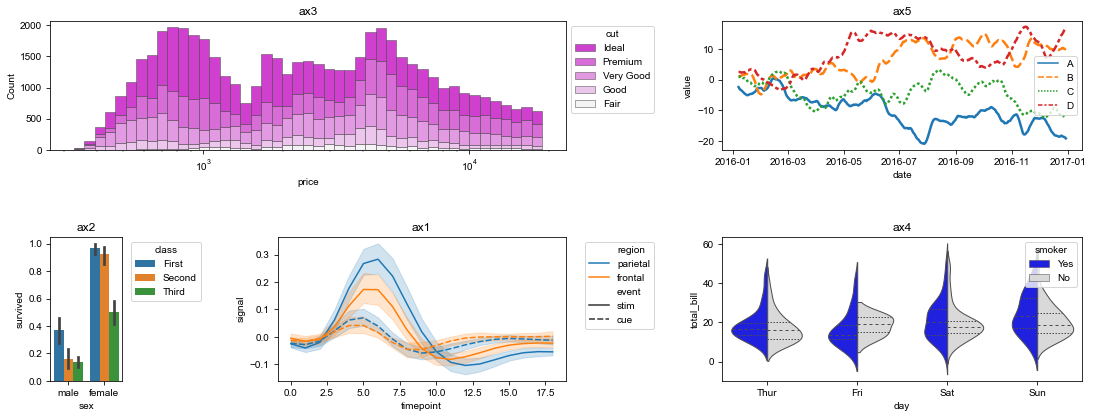

In [22]:
%%time
ax35214_v3 = ax3214["ax3"]|ax5
ax35214_v3.savefig(quick=quick)

### 3: Arrange multiple plots with their outlines aligned (under inprementation).

CPU times: user 431 ms, sys: 8.39 ms, total: 440 ms
Wall time: 439 ms


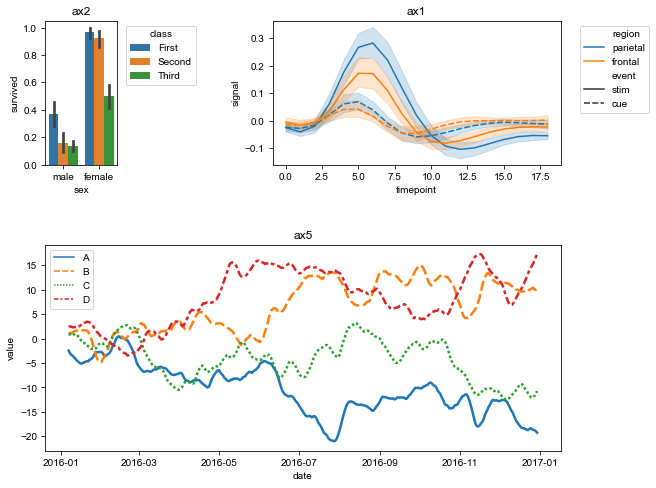

In [23]:
%%time
ax21  = ax2|ax1
ax215 = ax21/ax5
ax215.savefig(quick=quick)

CPU times: user 637 ms, sys: 9.52 ms, total: 646 ms
Wall time: 645 ms


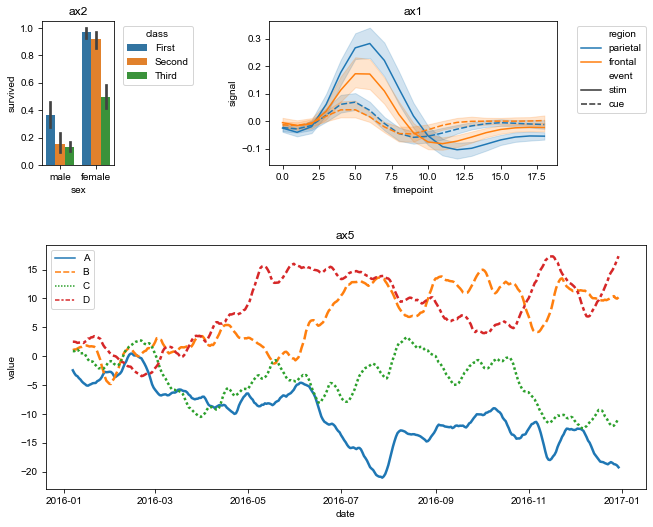

In [24]:
%%time
ax215 = ax21.outline/ax5.outline
ax215.savefig(quick=quick)

In [25]:
pw.clear()

### 4: Advanced usage: Joint plot

CPU times: user 56.3 ms, sys: 3.82 ms, total: 60.1 ms
Wall time: 58.8 ms


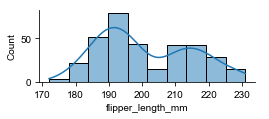

In [26]:
%%time
penguins = sns.load_dataset("penguins")
ax1 = pw.Brick("ax1", figsize=(3,1))
sns.histplot(data=penguins, x="flipper_length_mm", kde=True, ax=ax1)
ax1.spines["top"].set_visible(False) 
ax1.spines["right"].set_visible(False)
ax1.savefig(quick=quick)

CPU times: user 59.2 ms, sys: 3.96 ms, total: 63.2 ms
Wall time: 60.1 ms


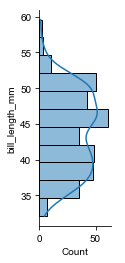

In [27]:
%%time
ax2 = pw.Brick("ax2", figsize=(1,3))
sns.histplot(data=penguins, y="bill_length_mm", kde=True, ax=ax2)
ax2.spines["top"].set_visible(False) 
ax2.spines["right"].set_visible(False)
ax2.savefig(quick=quick)

CPU times: user 54.3 ms, sys: 3.58 ms, total: 57.9 ms
Wall time: 58.8 ms


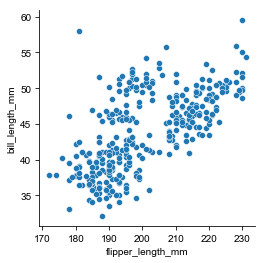

In [28]:
%%time
ax3 = pw.Brick("ax3", figsize=(3,3))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", ax=ax3)
ax3.spines["top"].set_visible(False) 
ax3.spines["right"].set_visible(False)
ax3.savefig(quick=quick)

In [29]:
ax1.set_xlim(ax3.get_xlim())
ax1.set_xticks([])
ax1.set_xlabel("") 

ax2.set_ylim(ax3.get_ylim())
ax2.set_yticks([])
ax2.set_ylabel("")

Text(16.200000000000003, 0.5, '')

CPU times: user 93.4 ms, sys: 1.95 ms, total: 95.4 ms
Wall time: 94.3 ms


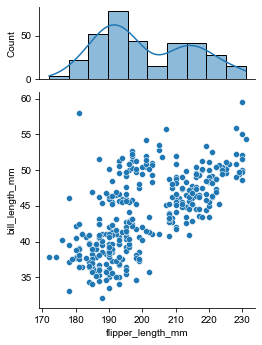

In [30]:
%%time
pw.param["margin"] = 0.1 #default value is 0.4
ax13 = ax1 / ax3
ax13.savefig(quick=quick)

CPU times: user 120 ms, sys: 3.52 ms, total: 124 ms
Wall time: 121 ms


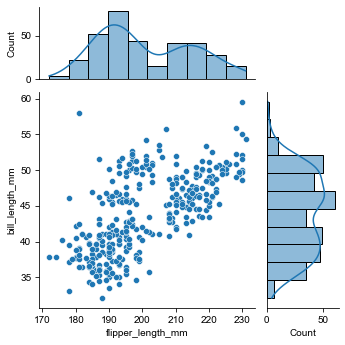

In [31]:
%%time
ax132 = ax13["ax3"] | ax2
ax132.savefig(quick=quick)

Off course, you can align multiple joint plots

CPU times: user 327 ms, sys: 4.51 ms, total: 331 ms
Wall time: 329 ms


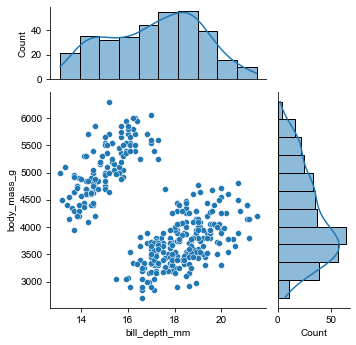

In [32]:
%%time
ax4 = pw.Brick("ax4", figsize=(3,1))
sns.histplot(data=penguins, x="bill_depth_mm", kde=True, ax=ax4)
ax4.spines["top"].set_visible(False) 
ax4.spines["right"].set_visible(False)

ax5 = pw.Brick("ax5", figsize=(1,3))
sns.histplot(data=penguins, y="body_mass_g", kde=True, ax=ax5)
ax5.spines["top"].set_visible(False) 
ax5.spines["right"].set_visible(False)
ax5.savefig()

ax6 = pw.Brick("ax6", figsize=(3,3))
sns.scatterplot(data=penguins, x="bill_depth_mm", y="body_mass_g", ax=ax6)
ax6.spines["top"].set_visible(False) 
ax6.spines["right"].set_visible(False)
ax6.savefig()

ax4.set_xlim(ax4.get_xlim())
ax4.set_xticks([])
ax4.set_xlabel("") 

ax5.set_ylim(ax5.get_ylim())
ax5.set_yticks([])
ax5.set_ylabel("")

ax46 = ax4 / ax6
ax465 = ax46["ax6"] | ax5
ax465.savefig(quick=quick)

CPU times: user 355 ms, sys: 3.62 ms, total: 359 ms
Wall time: 357 ms


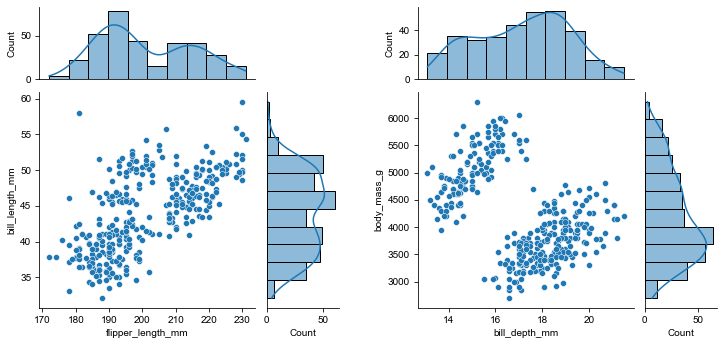

In [33]:
%%time
pw.param["margin"] = 0.5
ax132465 = ax132 | ax465
ax132465.savefig(quick=quick)

In [42]:
pw.clear()

### 5: Heatmap with colorbar
When creating heatmap pltos using patchworklib, I recommand to create heatmap and color bar objects separately, as follows.

In [43]:
import matplotlib as mpl
data1 = 20 * np.random.rand(100,100) - 10
data2 = 20 * np.random.rand(100,100) - 10

cmap = mpl.cm.Reds
norm = mpl.colors.Normalize(vmin=-10, vmax=10)
ax1 = pw.Brick("axx", figsize=(3,3))
ax2 = pw.Brick("axy", figsize=(3,3))
ax1.imshow(data1, interpolation='nearest', cmap=cmap, aspect="auto")
ax2.imshow(data2, interpolation='nearest', cmap=cmap, aspect="auto")

CPU times: user 293 ms, sys: 3.4 ms, total: 296 ms
Wall time: 294 ms


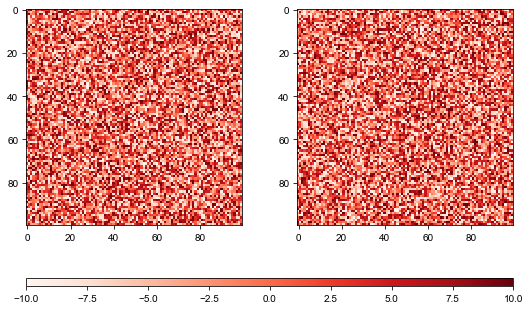

In [44]:
%%time
ax_cb1 = pw.Brick("ax_cb1", figsize=(6, 0.1))
cb1 = mpl.colorbar.ColorbarBase(ax_cb1, cmap=cmap, norm=norm, orientation='horizontal')
heatmap1 = (ax1|ax2)
heatmap1 = heatmap1/ax_cb1
heatmap1.savefig(quick=quick)

CPU times: user 748 ms, sys: 6.55 ms, total: 754 ms
Wall time: 751 ms


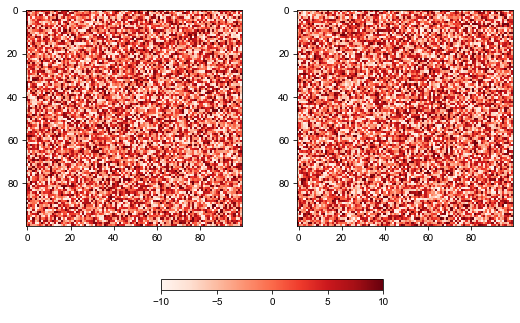

In [45]:
%%time
ax_cb1_2 = pw.Brick("ax_cb1_2", figsize=(2, 0.1))
cb1 = mpl.colorbar.ColorbarBase(ax_cb1_2, cmap=cmap, norm=norm, orientation='horizontal')
heatmap1 = ax1|ax2
heatmap1 = heatmap1/(pw.spacer(ax_cb1_2,0.5)|ax_cb1_2|pw.spacer(ax_cb1_2,0.5))
heatmap1.savefig(quick=quick)

CPU times: user 240 ms, sys: 3.75 ms, total: 243 ms
Wall time: 241 ms


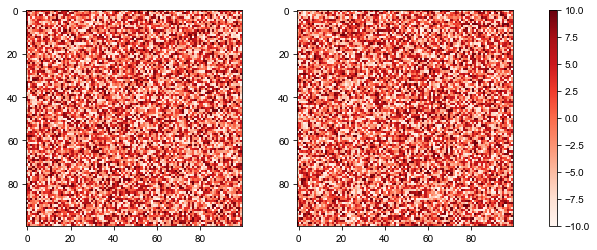

In [46]:
%%time
ax_cb    = pw.Brick("ax_cb", figsize=(0.1,3))
cb       = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap, norm=norm)
ax12     = ax1|ax2
heatmap2 = ax12|ax_cb
heatmap2.savefig()

CPU times: user 603 ms, sys: 5.2 ms, total: 608 ms
Wall time: 606 ms


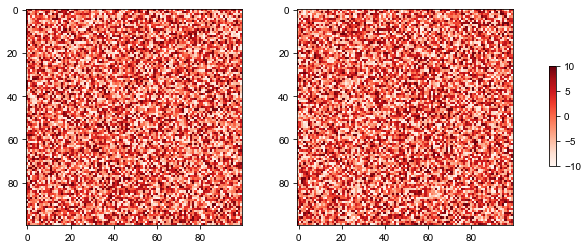

In [47]:
%%time
ax_cb2   = pw.Brick("ax_cb2", figsize=(0.1,1.5))
cb2      = mpl.colorbar.ColorbarBase(ax_cb2, cmap=cmap, norm=norm)
heatmap2 = ax12 | (pw.spacer(ax_cb2,0.5)/ax_cb2/pw.spacer(ax_cb2,0.5))
heatmap2.savefig(quick=quick)

CPU times: user 576 ms, sys: 3.71 ms, total: 579 ms
Wall time: 579 ms


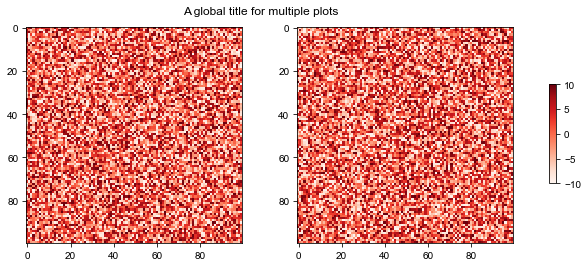

In [48]:
%%time
ax12.case.set_title("A global title for multiple plots", pad=10)
heatmap2 = ax12|(pw.spacer(ax_cb2,0.5)/ax_cb2/pw.spacer(ax_cb2,0.5))
heatmap2.savefig(quick=quick)

In [41]:
print(time.time()-t0)

28.648927927017212
